In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import re
import os
import glob
from datetime import datetime as dt
import warnings
from time import sleep
from tqdm import tqdm

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#### Read the input data conditioned for ML

In [2]:
data_path = "../03_Data_Cleaning/data/*.csv"
listing = glob.glob(data_path)
latest_file = max(listing, key=os.path.getctime)
print(f'The file selected is: {latest_file}')

# Create the input DF
df = pd.read_csv(latest_file)
df

The file selected is: ../03_Data_Cleaning/data\ML_data_Houston_TX_Houses_merged_2023_1_1_12_5.csv


,Lat,Lng,Price,Bedrooms,Bathrooms,constructedArea,zipCode,hasGarage,hasPool,hasCooling,hasView,yearBuilt,stories,parkingSpaces,annualHOI,schoolElemRating,schoolElemDist,schoolMidRating,schoolMidDist,schoolHighRating,schoolHighDist,priceIncreased,priceDiff,days,lotAreaSQFT
0,29.603600,-95.485405,276000,3,2,3612,77489,1,0,1,0,1971,2,2,1159,6,0.5,3,1.3,2,1.1,1,31000,1213,8764.272
1,29.600388,-95.488210,220000,3,2,1270,77489,1,0,1,0,1972,1,1,924,6,0.3,3,1.3,2,1.0,1,65100,503,7884.360
2,29.595436,-95.485880,230000,4,2,1765,77489,1,0,1,0,1974,1,2,966,6,0.3,3,1.0,2,0.6,1,115275,5140,7148.196
3,29.597320,-95.492690,225000,3,2,1444,77489,1,0,1,0,1978,1,2,945,6,0.1,3,1.4,2,1.0,1,56000,824,7731.900
4,29.592060,-95.489050,246500,3,2,1738,77489,1,0,1,0,1978,1,2,1035,6,0.3,3,1.0,2,0.6,1,41500,6810,8062.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,29.808900,-95.408710,669900,3,3,2576,77008,1,0,1,0,2022,2,2,2814,5,0.3,5,0.7,5,1.3,1,404900,3993,3275.000
4495,29.775753,-95.407600,519000,3,4,2513,77007,1,0,1,0,2006,3,2,2180,8,1.2,6,1.6,5,1.5,1,522400,4145,2330.460
4496,29.685492,-95.371700,550000,1,2,5160,77021,1,0,1,0,1952,1,2,2310,2,0.3,3,0.6,2,2.5,1,375000,4219,15000.000
4497,29.778660,-95.415340,450000,3,4,2148,77007,1,0,1,0,2007,3,2,1890,4,1.0,6,2.0,3,2.7,0,0,0,2051.676


In [3]:
# Remove outlier price:
df = df[df['Price'] >= 200000] 
df

,Lat,Lng,Price,Bedrooms,Bathrooms,constructedArea,zipCode,hasGarage,hasPool,hasCooling,hasView,yearBuilt,stories,parkingSpaces,annualHOI,schoolElemRating,schoolElemDist,schoolMidRating,schoolMidDist,schoolHighRating,schoolHighDist,priceIncreased,priceDiff,days,lotAreaSQFT
0,29.603600,-95.485405,276000,3,2,3612,77489,1,0,1,0,1971,2,2,1159,6,0.5,3,1.3,2,1.1,1,31000,1213,8764.272
1,29.600388,-95.488210,220000,3,2,1270,77489,1,0,1,0,1972,1,1,924,6,0.3,3,1.3,2,1.0,1,65100,503,7884.360
2,29.595436,-95.485880,230000,4,2,1765,77489,1,0,1,0,1974,1,2,966,6,0.3,3,1.0,2,0.6,1,115275,5140,7148.196
3,29.597320,-95.492690,225000,3,2,1444,77489,1,0,1,0,1978,1,2,945,6,0.1,3,1.4,2,1.0,1,56000,824,7731.900
4,29.592060,-95.489050,246500,3,2,1738,77489,1,0,1,0,1978,1,2,1035,6,0.3,3,1.0,2,0.6,1,41500,6810,8062.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,29.808900,-95.408710,669900,3,3,2576,77008,1,0,1,0,2022,2,2,2814,5,0.3,5,0.7,5,1.3,1,404900,3993,3275.000
4495,29.775753,-95.407600,519000,3,4,2513,77007,1,0,1,0,2006,3,2,2180,8,1.2,6,1.6,5,1.5,1,522400,4145,2330.460
4496,29.685492,-95.371700,550000,1,2,5160,77021,1,0,1,0,1952,1,2,2310,2,0.3,3,0.6,2,2.5,1,375000,4219,15000.000
4497,29.778660,-95.415340,450000,3,4,2148,77007,1,0,1,0,2007,3,2,1890,4,1.0,6,2.0,3,2.7,0,0,0,2051.676


#### Perform basic QC on the input DF

In [4]:
# Check if there are any null values
df.isnull().sum()

Lat                 0
Lng                 0
Price               0
Bedrooms            0
Bathrooms           0
constructedArea     0
zipCode             0
hasGarage           0
hasPool             0
hasCooling          0
hasView             0
yearBuilt           0
stories             0
parkingSpaces       0
annualHOI           0
schoolElemRating    0
schoolElemDist      0
schoolMidRating     0
schoolMidDist       0
schoolHighRating    0
schoolHighDist      0
priceIncreased      0
priceDiff           0
days                0
lotAreaSQFT         0
dtype: int64

In [5]:
# Get statistics
df.describe()

,Lat,Lng,Price,Bedrooms,Bathrooms,constructedArea,zipCode,hasGarage,hasPool,hasCooling,hasView,yearBuilt,stories,parkingSpaces,annualHOI,schoolElemRating,schoolElemDist,schoolMidRating,schoolMidDist,schoolHighRating,schoolHighDist,priceIncreased,priceDiff,days,lotAreaSQFT
count,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4498.000000,4.498000e+03,4498.000000,4498.000000
mean,29.803049,-95.416918,401394.400178,3.400845,2.836149,2159.437972,77070.781903,0.834593,0.062250,0.957759,0.010671,1993.488662,1.689418,1.744775,1688.086261,4.662961,1.098221,4.587817,1.811761,3.534682,2.244220,0.433081,-5.651795e+03,1406.239217,7290.854534
std,0.122779,0.137707,156990.084336,0.701705,0.878959,709.985274,81.286338,0.371589,0.241636,0.201161,0.102761,28.984694,0.728882,0.800961,660.955976,1.736157,1.123417,1.722189,1.240681,1.544470,1.618504,0.495557,3.642492e+06,2169.173004,8653.115673
min,29.538467,-95.737920,200000.000000,1.000000,1.000000,480.000000,77003.000000,0.000000,0.000000,0.000000,0.000000,1888.000000,1.000000,0.000000,840.000000,1.000000,0.000000,2.000000,0.100000,1.000000,0.100000,0.000000,-2.439261e+08,0.000000,1240.000000
25%,29.716101,-95.503971,280000.000000,3.000000,2.000000,1681.000000,77022.000000,1.000000,0.000000,1.000000,0.000000,1970.000000,1.000000,2.000000,1176.000000,3.000000,0.400000,3.000000,0.800000,2.000000,1.100000,0.000000,-5.000000e+03,22.000000,4229.676000
50%,29.802935,-95.420545,364000.000000,3.000000,3.000000,2020.000000,77057.000000,1.000000,0.000000,1.000000,0.000000,2003.000000,2.000000,2.000000,1533.000000,4.000000,0.700000,4.000000,1.500000,3.000000,1.800000,0.000000,0.000000e+00,189.000000,6993.558000
75%,29.864230,-95.340965,469990.000000,4.000000,3.000000,2528.750000,77084.000000,1.000000,0.000000,1.000000,0.000000,2022.000000,2.000000,2.000000,1974.000000,6.000000,1.200000,6.000000,2.600000,5.000000,2.800000,1.000000,1.017500e+05,2357.750000,8158.788000
max,30.096247,-95.085840,900000.000000,8.000000,7.000000,6793.000000,77598.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,5.000000,9.000000,3780.000000,10.000000,4.000000,10.000000,7.200000,9.000000,8.100000,1.000000,8.945000e+05,13561.000000,174240.000000


<AxesSubplot:>

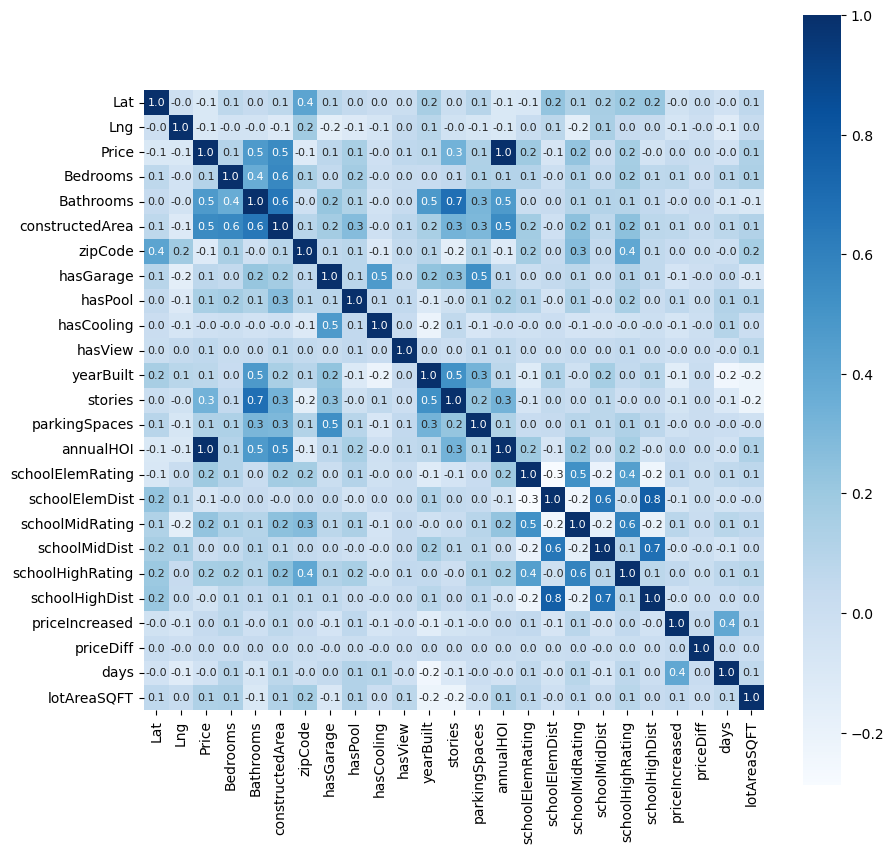

In [6]:
# Heat map
# A heat map shows the correlation between the input data columns
# There are 2 types of correlation:
# Positive: As the magnitude of a feature increases, the magnitude of a correlated feature increases
# Negative: As the magnitude of a feature increases, the magnitude of a correlated feature decreases
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

#### Get the features and the target column

In [7]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# X = Features, y = target
X = df.drop('Price', axis=1)
y = df[["Price"]]

#### Split the data for training and testing

In [8]:
# Use 20% of data for testing. Use a random_state = 2 to be able to reproduce the splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(4498, 24) (3598, 24) (900, 24)


#### Model Training

In [9]:
# Load the model (XGBoost Regressor)
model = XGBRegressor()

# Train the model with the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Evaluate the model performance

In [11]:
# Accuracy of the model by predicting y using training data
y_train_predicted = model.predict(X_train)

# Calculate the R squared error
error_r2 = metrics.r2_score(y_train, y_train_predicted)

# Calculate the mean absolute error
error_ma = metrics.mean_absolute_error(y_train, y_train_predicted)

print(f'R squared error: {error_r2} (should be close to 1; Mean Absolute Error: {error_ma})')

R squared error: 0.9999778958562209 (should be close to 1; Mean Absolute Error: 458.70691182601445)


#### Make predictions using the test data

In [12]:
y_test_predicted = model.predict(X_test)

# Calculate the R squared error
error_r2 = metrics.r2_score(y_test, y_test_predicted)

# Calculate the mean absolute error
error_ma = metrics.mean_absolute_error(y_test, y_test_predicted)

print(f'R squared error: {error_r2} (should be close to 1; Mean Absolute Error: {error_ma})')

R squared error: 0.999422386064596 (should be close to 1; Mean Absolute Error: 1724.0963368055557)


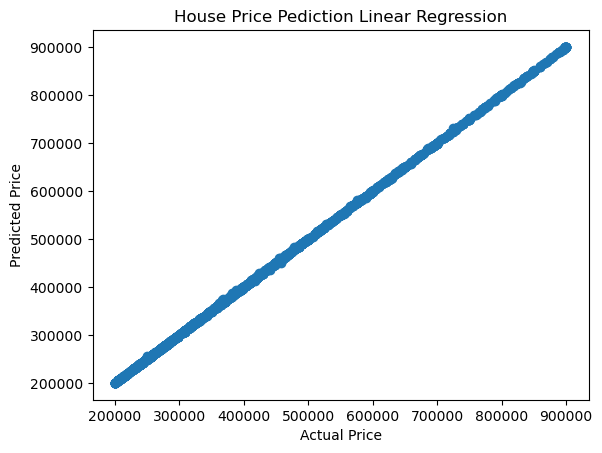

In [13]:
# Plot the linear regression
plt.scatter(y_train, y_train_predicted)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('House Price Pediction Linear Regression')
plt.show()

In [15]:
# Display the actual price vs the predicted price
y_test_df = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame(y_test_predicted, columns = ['Predicted_Price'])

# Display the actual and the predicted prices side by side
df_prices = pd.concat([y_test_df, y_pred_df], axis=1)
df_prices

,Price,Predicted_Price
0,250000,249935.859375
1,260000,260604.843750
2,244990,245265.671875
3,825000,821390.312500
4,599900,599963.375000
...,...,...
895,474500,473642.156250
896,300045,301064.093750
897,399900,401425.156250
898,599000,593888.500000
